# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [495]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="right")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [496]:
# Checking the number of mice.
total_mice = df["Mouse ID"].nunique()
total_mice

249

In [497]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = df[df.duplicated()]

duplicated_mouse_id = duplicated_mouse.iloc[0,0]

print(f"Mouse with duplicated information is: {duplicated_mouse_id}")
duplicated_mouse

Mouse with duplicated information is: g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.0,0


In [498]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df["Mouse ID"] == duplicated_mouse_id]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [499]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df["Mouse ID"] != duplicated_mouse_id]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [500]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [501]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]

mean_grouped_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_grouped_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_grouped_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_grouped_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_grouped_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistical_df = pd.DataFrame({
    "mean": mean_grouped_data,
    "median": median_grouped_data,
    "var": var_grouped_data,
    "std": std_grouped_data,
    "sem": sem_grouped_data
})

statistical_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [502]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

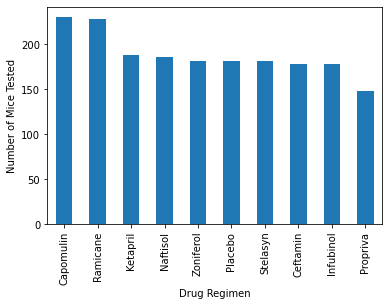

In [540]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_df = clean_df.groupby("Drug Regimen")["Timepoint"].count()
bar_df = bar_df.sort_values(ascending=False)

bar_plot = bar_df.plot.bar(bar_df)
bar_plot.set_ylabel("Number of Mice Tested")

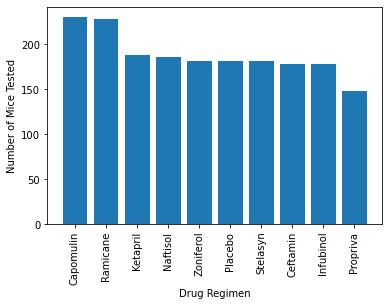

In [514]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

grouped_df = clean_df.groupby("Drug Regimen")["Timepoint"].count()
grouped_df = grouped_df.sort_values(ascending=False)

mouse_count = []
for count in grouped_df:
    mouse_count.append(count)

drug_name = grouped_df.index

plt.bar(drug_name, mouse_count)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:ylabel='Sex'>

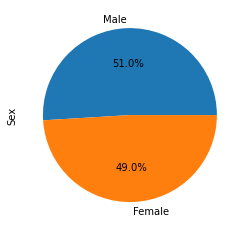

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count_df = clean_df["Sex"].value_counts()
gender_count_df.plot(kind="pie", autopct="%.1f%%")

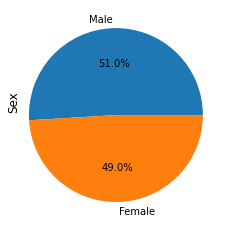

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = clean_df.loc[clean_df["Sex"] == "Male"].count()[0]
female = clean_df.loc[clean_df["Sex"] == "Female"].count()[0]

sex = [male, female]
labels = ["Male", "Female"]


plt.pie(sex, labels=labels, autopct="%.1f%%")
plt.title("Sex", loc='left', y=0.5, rotation=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [443]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = clean_df.groupby('Mouse ID')[['Timepoint']].max()
grouped_df.reset_index(inplace = True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, grouped_df, on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f932,Ketapril,Male,15,29,0,45.000000,0
1,x336,Naftisol,Female,4,29,0,45.000000,0
2,h428,Ketapril,Female,1,27,0,45.000000,0
3,v199,Naftisol,Female,17,29,0,45.000000,0
4,o848,Stelasyn,Female,14,27,0,45.000000,0
...,...,...,...,...,...,...,...,...
243,r944,Capomulin,Male,12,25,45,41.581521,2
244,u364,Capomulin,Male,18,17,45,31.023923,3
245,p438,Ceftamin,Female,11,26,45,61.433892,1
246,x773,Placebo,Female,21,30,45,58.634971,4


In [485]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
for name in drug_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    each_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == name, "Tumor Volume (mm3)"].to_frame()
    
    # add subset 
    tumor_vol_data.append(each_tumor_vol['Tumor Volume (mm3)'].to_list())


# Determine outliers using upper and lower bounds
quartiles = each_tumor_vol['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
    
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

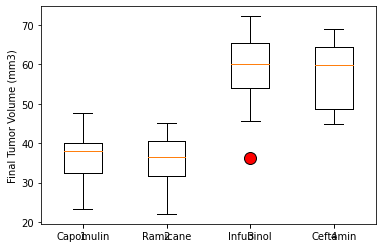

In [547]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots() 

ax1.boxplot(tumor_vol_data, labels=drug_names)
plt.ylabel('Final Tumor Volume (mm3)')

flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none')
ax1.boxplot(tumor_vol_data, flierprops = flierprops)

plt.show()

## Line and Scatter Plots

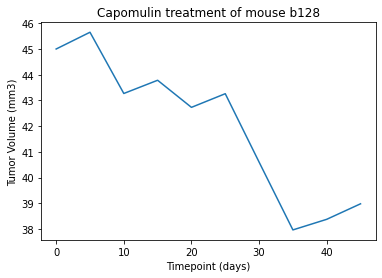

In [523]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'b128')]

mouse_x = mouse_df['Timepoint']
mouse_y = mouse_df['Tumor Volume (mm3)']

plt.plot(mouse_x, mouse_y)
plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

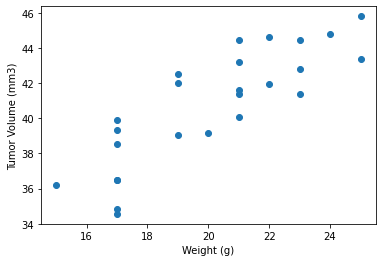

In [524]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
grouped_df = mouse_df.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()

x_values = grouped_df['Weight (g)']
y_values = grouped_df['Tumor Volume (mm3)']

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.scatter(x_values, y_values)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


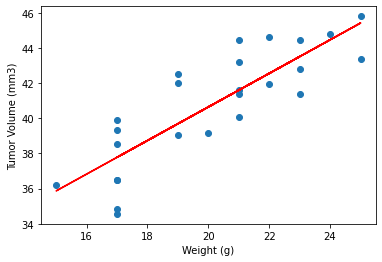

In [539]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.scatter(x_values, y_values)

plt.title(print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}"))
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
correlation = st.pearsonr(x_values, y_values)
plt.show()

